# Editing efficiency analysis

This notebook contains the code to analyze the overall editing efficiency (by C position) for all the validation sgRNAs that we tested. This notebook takes as input the nucleotide_percentage files generated by the BEV_nucleotide_percentage_plots notebook.

In [1]:
import sys
sys.path.append('../scripts/')
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import notebook_functions as nb

mpl.rc('pdf', fonttype=42)
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
sns.set_context('paper')
sns.set_style('ticks')
boxprops = {'edgecolor': 'k', 'linewidth': 0.5, 'facecolor': 'w'}
lineprops = {'color': 'k', 'linewidth': 0.5}
stripplot_kwargs = dict({'linewidth': 0.5, 'size': 3, 'alpha': 0.8})
boxplot_kwargs = dict({'boxprops': {'linewidth':0,'facecolor':'w'}, 'medianprops': {'linewidth':1},
                       'whiskerprops': {'linewidth':0}, 'capprops': {'linewidth':0},
                       'width': 0.8,'whis':(10,90)})


## User inputs

<font color='blue'> Please follow steps indicated in blue, then run the notebook to generate output files. If the files are formatted as described in the documentation, the code in the 'Functions' section should not need to be altered. </font> 

**Metainformation file** 

<font color='blue'> <b>Step 1:</b> Please enter the filepath to the metainformation input file used in the allele frequencies notebook. The same file will be used in this notebook. </font> 

In [4]:
global old_input_file
# input_filepath = 'AudreyData/Metainfo_input_f2_r1_ABE.csv'
input_filepath = input("Please enter input filepath here: ")
old_input_file = pd.read_csv(input_filepath)

old_input_file

Please enter input filepath here: ../../AudreyData/TP53/Metainfo_input_ABE_TP53_fixed_updated_1d_sample.csv


,sg,sgRNA_sequence,translation_ref_seq,BEV_start,BEV_end,primer,frame,first_codon,last_codon,rev_com,BEV_ref,BEV_test
0,1d,GCTCCTCCATGGCAGTGACC,[TTCCTCTTGCAGCAGCCAGACTGCCTTCCGGGTCACTGCC]ATGG...,417,426,F3_R2,1,ATG,CTG,True,417;418,425;426


<font color='blue'><b>Step 2:</b> Enter filepath to folder where the files generated by the nucleotide percentage notebook were stored. Please make sure that the filepath ends in a '/'. </font> 

In [5]:
# User inputs filepath where nucleotide_percentage outputs are stored
global nuc_per_filepath
# nuc_per_filepath = 'AudreyData/Validation_CRISPResso_results/nucleotide_percentage/'
nuc_per_filepath = input("Please enter filepath to folder with nucleotide percentage outputs here: ")
nuc_per_filepath = nb.check_folder_filepath(nuc_per_filepath)
print(nuc_per_filepath)

Please enter filepath to folder with nucleotide percentage outputs here: ../../AudreyData/TP53/ABE/nucleotide_percentage
../../AudreyData/TP53/ABE/nucleotide_percentage/


<font color='blue'><b>Step 3:</b> Enter filepath to folder where the files generated by this notebook will be stored. Please make sure that the filepath ends in a '/'. If the folders in this file path do not currently exist, they will be created when the notebook is run.  </font> 

In [6]:
# User inputs filepath to store editing efficency outputs
global output_filepath
# output_filepath = 'AudreyData/Validation_CRISPResso_results/'
output_filepath = input("Please enter output folder filepath here: ")
output_filepath = nb.check_folder_filepath(output_filepath)
print(output_filepath)

Please enter output folder filepath here: ../../AudreyData/TP53/ABE/
../../AudreyData/TP53/ABE/


<font color='blue'><b>Step 4:</b> Enter the name of the gene targeted in experiment. </font> 

In [7]:
# User inputs name of gene being targeted
global experiment
experiment = input("Please enter gene name here: ")


Please enter gene name here: TP53


<font color='blue'><b>Step 5:</b> Please select the type of base editor (BE) used in the samples in input file. 

In [8]:
# User inputs type of base editor
global be_type

be_type_input = input("Please specify the type of base editor used in the input samples by entering 'A' for A base editor or 'C' for C base editor: ")

Please specify the type of base editor used in the input samples by entering 'A' for A base editor or 'C' for C base editor: A


In [9]:
# Make sure a base editor is selected and not default value

if (be_type_input != 'A') and (be_type_input != 'C'):
    raise Exception('Invalid input. Please enter either A or C to specify base editor.')

else:
    be_type = be_type_input + 'BE'

<IPython.core.display.Javascript object>

In [12]:
# Generate editing efficiency table
df = nb.run_editing_eff(old_input_file, nuc_per_filepath, output_filepath, experiment, be_type)
save_filepath = output_filepath + 'editing_efficiency_input.csv'
df.to_csv(save_filepath)

../../AudreyData/TP53/ABE/nucleotide_percentage/BEV_417_418_F3_R2.csv


In [13]:
df = df.copy().drop('sg', axis=1).drop_duplicates()
if be_type == 'ABE':
    df.loc[(df['Position'] >= 4) & (df['Position'] <= 8) & (df['Nucleotide'] == 'G'),'Position'].value_counts()
elif be_type == 'CBE':
    df.loc[(df['Position'] >= 4) & (df['Position'] <= 8) & (df['Nucleotide'] == 'T'),'Position'].value_counts()

## Generate plots

<font color='blue'><b>Step 6:</b> Enter the target nucleotide of interest (T, A, G, C, or del). You can re-run the following cells to change the nucleotide being plotted. </font> 

In [15]:
nuc = input("Please enter target nucleotide here: ")

Please enter target nucleotide here: G


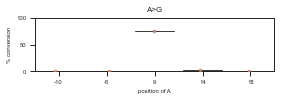

In [16]:
fig,ax = nb.make_editing_eff_plot(df, nuc,[experiment], be_type, output_filepath)


